# DAT210x - Programming with Python for DS

## Module5- Lab9

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matplotlib.style.use('ggplot') # Look Pretty

### A Convenience Function

This convenience method will take care of plotting your test observations, comparing them to the regression line, and displaying the R2 coefficient

In [2]:
def drawLine(model, X_test, y_test, title, R2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print(title)
    print("Intercept(s): ", model.intercept_)

    plt.show()

In [3]:
def drawPlane(model, X_test, y_test, title, R2):
    # This convenience method will take care of plotting your
    # test observations, comparing them to the regression plane,
    # and displaying the R2 coefficient
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_zlabel('prediction')

    
    # You might have passed in a DataFrame, a Series (slice),
    # an NDArray, or a Python List... so let's keep it simple:
    X_test = np.array(X_test)
    col1 = X_test[:,0]
    col2 = X_test[:,1]

    
    # Set up a Grid. We could have predicted on the actual
    # col1, col2 values directly; but that would have generated
    # a mesh with WAY too fine a grid, which would have detracted
    # from the visualization
    x_min, x_max = col1.min(), col1.max()
    y_min, y_max = col2.min(), col2.max()
    x = np.arange(x_min, x_max, (x_max-x_min) / 10)
    y = np.arange(y_min, y_max, (y_max-y_min) / 10)
    x, y = np.meshgrid(x, y)

    
    # Predict based on possible input values that span the domain
    # of the x and y inputs:
    z = model.predict(  np.c_[x.ravel(), y.ravel()]  )
    z = z.reshape(x.shape)

    
    ax.scatter(col1, col2, y_test, c='g', marker='o')
    ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print(title)
    print("Intercept(s): ", model.intercept_)

    plt.show()

### The Assignment

Let's get started!

First, as is your habit, inspect your dataset in a text editor, or spread sheet application. The first thing you should notice is that the first column is both unique (the name of each) college, as well as unlabeled. This is a HINT that it must be the index column. If you do not indicate to Pandas that you already have an index column, it'll create one for you, which would be undesirable since you already have one.

Review the `.read_csv()` documentation and discern how to load up a dataframe while indicating which existing column is to be taken as an index. Then, load up the College dataset into a variable called `X`:

In [8]:
x = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/College.csv', index_col=0)
print (x.head(), x.shape)
print x.dtypes
for n in x.columns:
    print (n,x[n].isnull().unique())
print(x.describe())

(                             Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene C

This line isn't necessary for your purposes; but we'd just like to show you an additional way to encode features directly. The `.map()` method is like `.apply()`, but instead of taking in a lambda / function, you simply provide a mapping of keys:values. If you decide to embark on the "Data Scientist Challenge", this line of code will save you the trouble of converting it through other means:

In [10]:
x.Private = x.Private.map({'Yes':1, 'No':0})

Create your linear regression model here and store it in a variable called `model`. Don't actually train or do anything else with it yet:

In [12]:
from sklearn import linear_model
model = linear_model.LinearRegression()

The first relationship we're interested in is the number of accepted students, as a function of the amount charged for room and board.

Using indexing, create two slices (series). One will just store the room and board column, the other will store the accepted students column. Then use train_test_split to cut your data up into `X_train`, `X_test`, `y_train`, `y_test`, with a `test_size` of 30% and a random_state of 7.

In [24]:
from sklearn.model_selection import train_test_split
data = x[['Room.Board']]
label = x[['Accept']]
print(data.head())
print(label.head())
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size = 0.3, random_state=7)

                              Room.Board
Abilene Christian University        3300
Adelphi University                  6450
Adrian College                      3750
Agnes Scott College                 5450
Alaska Pacific University           4120
                              Accept
Abilene Christian University    1232
Adelphi University              1924
Adrian College                  1097
Agnes Scott College              349
Alaska Pacific University        146


Fit and score your model appropriately. Store the score in the `score` variable.

In [21]:
model.fit(x_train,y_train)
score = model.score(x_test,y_test)

We'll take it from here, buddy:

Accept(Room&Board) R2: -0.00266698641455
('Intercept(s): ', array([ 1340.61956519]))


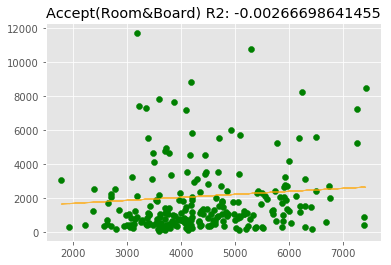

In [22]:
drawLine(model, x_test, y_test, "Accept(Room&Board)", score)

Duplicate the process above; this time, model the number of accepted students, as a function of the number of enrolled students per college.

In [30]:
data = x[['Enroll']]
label = x[['Accept']]
print(data.head())
print(label.head())
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size = 0.3, random_state=7)
model.fit(x_train,y_train)
score = model.score(x_test,y_test)

                              Enroll
Abilene Christian University     721
Adelphi University               512
Adrian College                   336
Agnes Scott College              137
Alaska Pacific University         55
                              Accept
Abilene Christian University    1232
Adelphi University              1924
Adrian College                  1097
Agnes Scott College              349
Alaska Pacific University        146


Accept(Enroll) R2: 0.857820486736
('Intercept(s): ', array([ 151.72611242]))


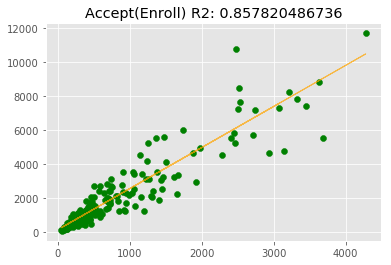

In [31]:
drawLine(model, x_test, y_test, "Accept(Enroll)", score)

Duplicate the process above; this time, model the number of accepted students, as as function of the number of failed undergraduate students per college.

In [32]:
data = x[['F.Undergrad']]
label = x[['Accept']]
print(data.head())
print(label.head())
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size = 0.3, random_state=7)
model.fit(x_train,y_train)
score = model.score(x_test,y_test)

                              F.Undergrad
Abilene Christian University         2885
Adelphi University                   2683
Adrian College                       1036
Agnes Scott College                   510
Alaska Pacific University             249
                              Accept
Abilene Christian University    1232
Adelphi University              1924
Adrian College                  1097
Agnes Scott College              349
Alaska Pacific University        146


Accept(F.Undergrad) R2: 0.777991797375
('Intercept(s): ', array([ 380.9429105]))


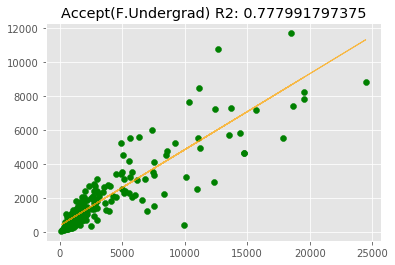

In [33]:
drawLine(model, x_test, y_test, "Accept(F.Undergrad)", score)

Duplicate the process above (almost). This time is going to be a bit more complicated. Instead of modeling one feature as a function of another, you will attempt to do multivariate linear regression to model one feature as a function of TWO other features.

Model the number of accepted students as a function of the amount charged for room and board _and_ the number of enrolled students. To do this, instead of creating a regular slice for a single-feature input, simply create a slice that contains both columns you wish to use as inputs. Your training labels will remain a single slice.

In [34]:
data = x[['Room.Board','Enroll']]
label = x[['Accept']]
print(data.head())
print(label.head())
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size = 0.3, random_state=7)
model.fit(x_train,y_train)
score = model.score(x_test,y_test)

                              Room.Board  Enroll
Abilene Christian University        3300     721
Adelphi University                  6450     512
Adrian College                      3750     336
Agnes Scott College                 5450     137
Alaska Pacific University           4120      55
                              Accept
Abilene Christian University    1232
Adelphi University              1924
Adrian College                  1097
Agnes Scott College              349
Alaska Pacific University        146


Accept(Room&Board,Enroll) R2: 0.876437177421
('Intercept(s): ', array([-1176.62848249]))


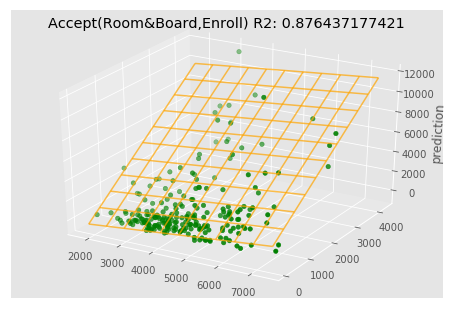

In [36]:
drawPlane(model, x_test, y_test, "Accept(Room&Board,Enroll)", score)

That concludes this assignment!

### Notes On Fitting, Scoring, and Predicting:

Here's a hint to help you complete the assignment without pulling your hair out! When you use `.fit()`, `.score()`, and `.predict()` on your model, SciKit-Learn expects your training data to be in spreadsheet (2D Array-Like) form. This means you can't simply pass in a 1D Array (slice) and get away with it.

To properly prep your data, you have to pass in a 2D Numpy Array, or a dataframe. But what happens if you really only want to pass in a single feature?

If you slice your dataframe using `df[['ColumnName']]` syntax, the result that comes back is actually a _dataframe_. Go ahead and do a `type()` on it to check it out. Since it's already a dataframe, you're good -- no further changes needed.

But if you slice your dataframe using the `df.ColumnName` syntax, OR if you call `df['ColumnName']`, the result that comes back is actually a series (1D Array)! This will cause SKLearn to bug out. So if you are slicing using either of those two techniques, before sending your training or testing data to `.fit` / `.score`, do `any_column = my_column.reshape(-1,1)`. 

This will convert your 1D array of `[n_samples]`, to a 2D array shaped like `[n_samples, 1]`. A single feature, with many samples.

If you did something like `my_column = [my_column]`, that would produce an array in the shape of `[1, n_samples]`, which is incorrect because SKLearn expects your data to be arranged as `[n_samples, n_features]`. Keep in mind, all of the above only relates to your `X` or input data, and does not apply to your `y` or labels.

### Data Scientist Challenge

You've experimented with a number of feature scaling techniques already, such as `MaxAbsScaler`, `MinMaxScaler`, `Normalizer`, `StandardScaler` and more from http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing.

What happens if you apply scaling to your data before doing  linear regression? Would it alter the quality of your results? Do the scalers that work on a per-feature basis, such as `MinMaxScaler` behave differently that those that work on a multi-feature basis, such as normalize? And moreover, once your features have been scaled, you won't be able to use the resulting regression directly... unless you're able to `.inverse_transform()` the scaling. Do all of the SciKit-Learn scalers support that?

This is your time to shine and to show how much of an explorer you are: Dive deeper into uncharted lands, browse SciKit-Learn's documentation, scour Google, ask questions on Quora, Stack-Overflow, and the course message board, and see if you can discover something that will be of benefit to you in the future!